# Random Forest Problem 1

Use random forest ensemble to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### Data Description:
- Undergrad : person is under graduated or not
- Marital.Status : marital status of a person
- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
- Work Experience : Work experience of an individual person
- Urban : Whether that person belongs to urban area or not

## Steps:

1. Import new data set
    - understand the dataset, look into it. 
    - add the new column fraud
    - perform EDA.
    - check data info and null values.
2. Visualisation EDA
    - making pairplot graphs to better understand the data.   
3. Feature engineering
    - understand all features involeved.
    - list out features that needs to be considered in the model.
    - get dummies if required
    - Train | test spilliting
4. Random Forest Classifier
    - Default Parameters
    - Evaluation
5. Visualisation of Trees estimators
    - Single tree estimator
    - Multiple tree estimators
6. Experimenting HyperParameters - Max features and Max tree nums
7. Conclusion



In [14]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

## Import New Dataset

In [2]:
raw_data = pd.read_csv("C:\\Users\\Vignesh R Babu\\excelR-datascience\\assignment_15_random_forests\\15Q1\\Fraud_check.csv")
raw_data.rename(columns={'Undergrad':'undergrad','Marital.Status':'marital_status','Taxable.Income':'tax_income','City.Population':'city_pop','Work.Experience':'work_exp','Urban':'urban'}, inplace=True)
df = raw_data.copy()
df.head()

,undergrad,marital_status,tax_income,city_pop,work_exp,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
#def func to assign fraud risky and good values

def filt(x):
    if x<=30000:
        return 'Risky'
    else:
        return 'Good'

In [4]:
df['fraud'] = df['tax_income'].copy()
df['fraud'] = df['fraud'].apply(filt)
df.head()

,undergrad,marital_status,tax_income,city_pop,work_exp,urban,fraud
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [5]:
df.fraud.value_counts()

Good     476
Risky    124
Name: fraud, dtype: int64

In [6]:
label_encoder = preprocessing.LabelEncoder()
df['undergrad']= label_encoder.fit_transform(df['undergrad']) 
df['urban']= label_encoder.fit_transform(df['urban']) 
df['marital_status']= label_encoder.fit_transform(df['marital_status']) 
df['fraud']= label_encoder.fit_transform(df['fraud'])

df.head()

,undergrad,marital_status,tax_income,city_pop,work_exp,urban,fraud
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [7]:
df.info() # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   undergrad       600 non-null    int32
 1   marital_status  600 non-null    int32
 2   tax_income      600 non-null    int64
 3   city_pop        600 non-null    int64
 4   work_exp        600 non-null    int64
 5   urban           600 non-null    int32
 6   fraud           600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


In [8]:
df.describe()

,undergrad,marital_status,tax_income,city_pop,work_exp,urban,fraud
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333,0.206667
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406,0.405252
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000,0.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000,0.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000,1.000000


## Visualization

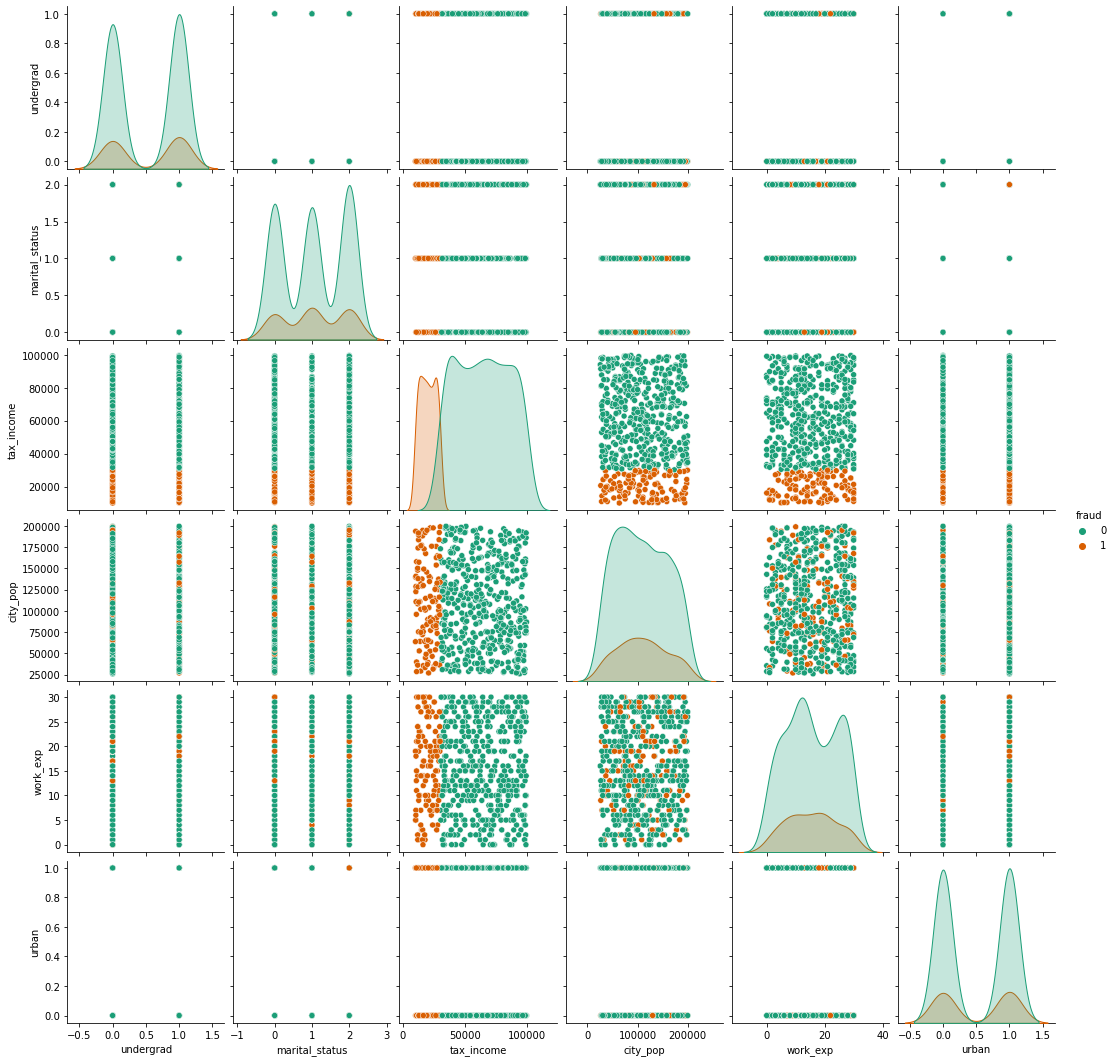

In [9]:
sns.pairplot(df,hue='fraud',palette='Dark2')

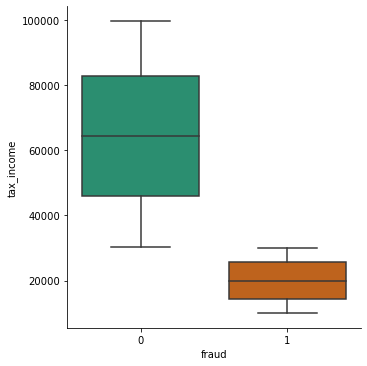

In [11]:
sns.catplot(x='fraud',y='tax_income',data=df,kind='box',palette='Dark2')

## Feature Engineering

All the features in the dataset are relevant and can be used for model training.
There are no dummies in the dataset.

### Train and Test Split data

In [12]:
X = df.iloc[:,:-1]
y =df.fraud

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

## Random Forest Classification
### Default Parameters

In [15]:
model =  RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [16]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [17]:
base_pred = model.predict(X_test)

### Evaluation

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [19]:
confusion_matrix(y_test,base_pred) #This is very good. But not sure if it's an overfitted model

array([[146,   0],
       [  0,  34]], dtype=int64)

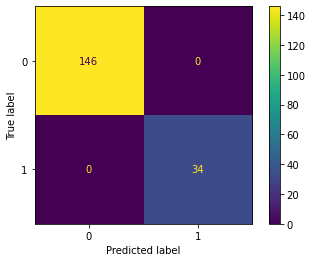

In [20]:
plot_confusion_matrix(model,X_test,y_test)

In [21]:
print(classification_report(y_test,base_pred)) #Near perfect values

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        34

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [22]:
model.feature_importances_

array([0.00268921, 0.00956613, 0.91284814, 0.05071584, 0.01893707,
       0.00524362])

In [23]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']) 
#Only tax_income matters since our tree is based on it. 

,Feature Importance
undergrad,0.002689
marital_status,0.009566
tax_income,0.912848
city_pop,0.050716
work_exp,0.018937
urban,0.005244


## Visualization of Tree estimators

### Visualization of a single tree estimator

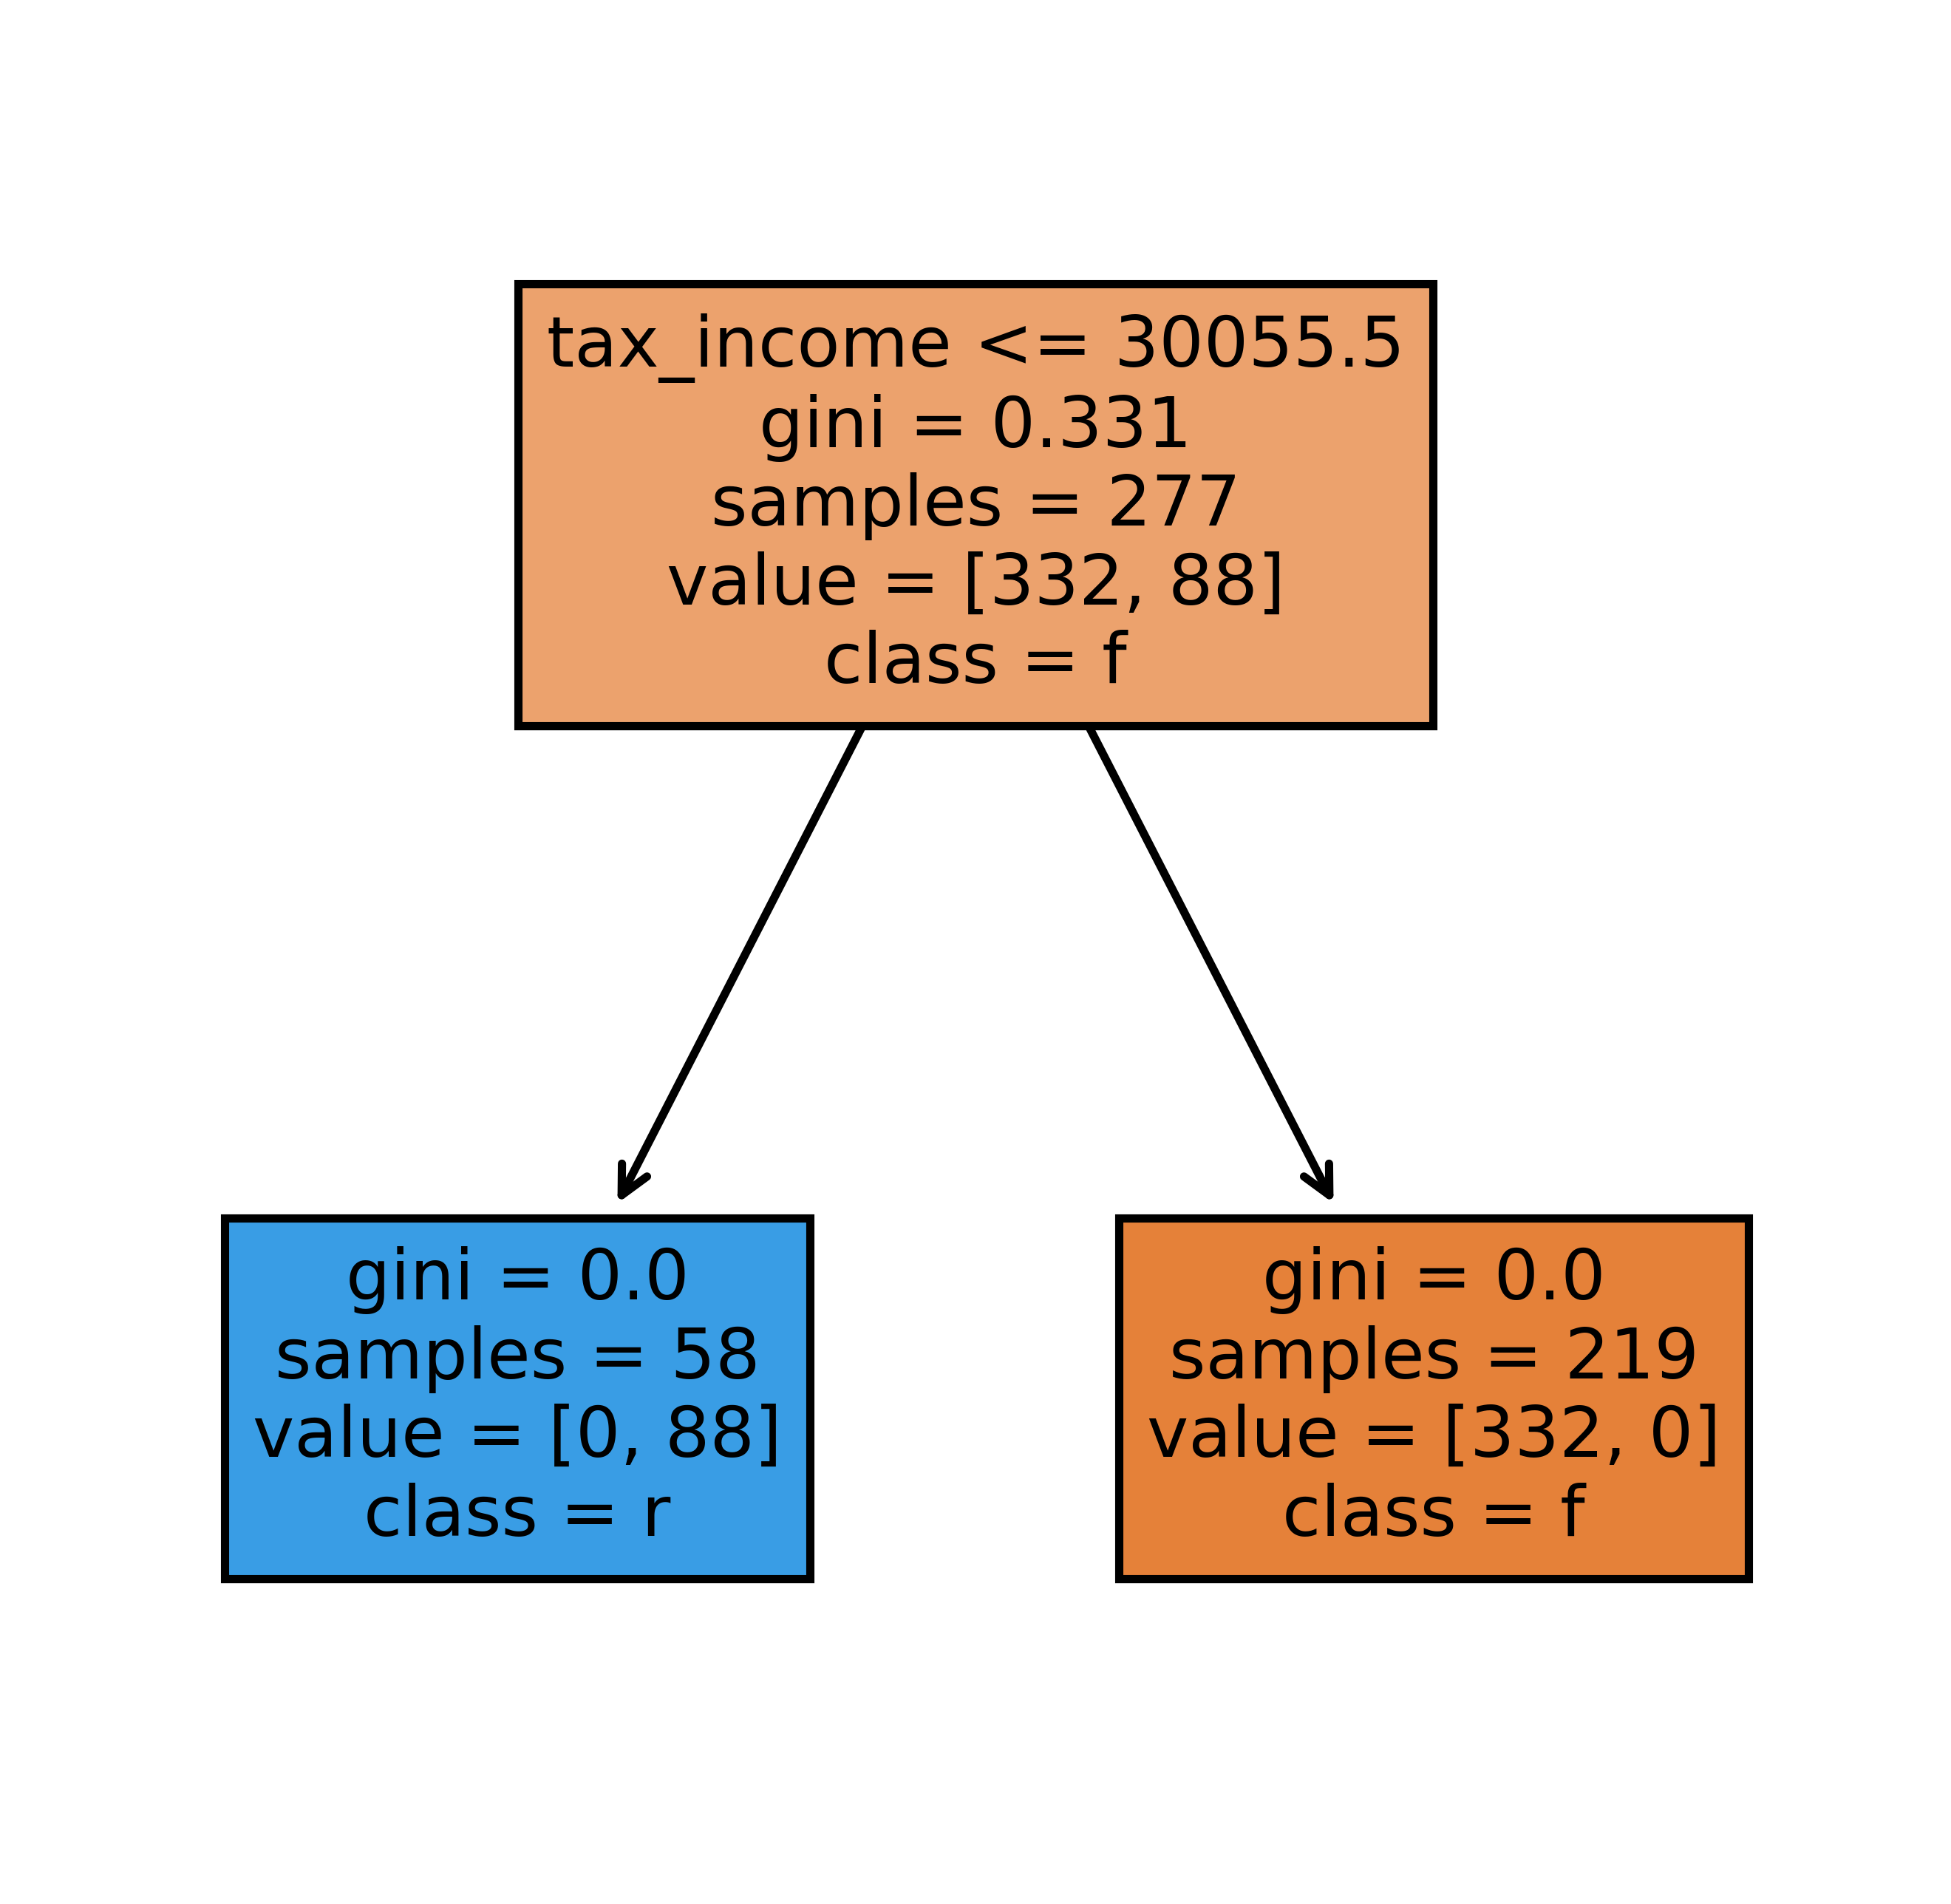

In [37]:
from sklearn import tree
fn=df.columns.values[:-1]
cn=df.columns.values[-1]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Visualization of multiple trees used as estimators

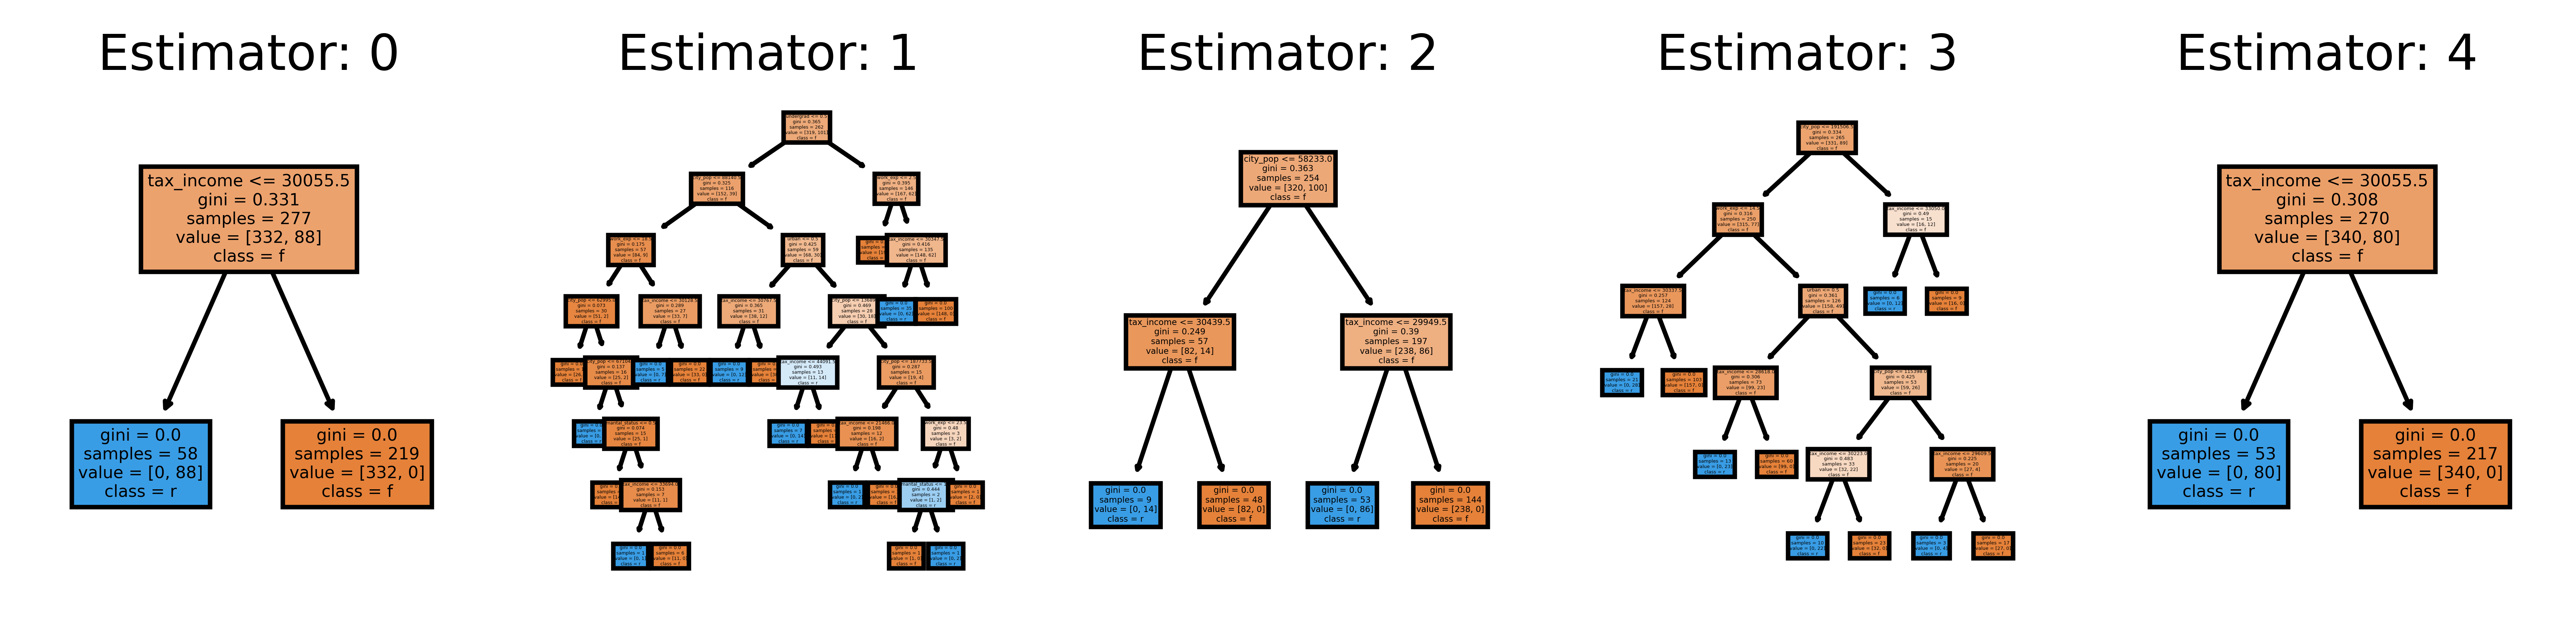

In [38]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900) 
for index in range(0, 5):
    tree.plot_tree(model.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

## Experimenting with HyperParameters

Not much experimentation can be done in this case since it is a straightforward model that requires no further changes.

## Conclusion

Random forest ensemble technique was perfomed on this dataset. However, the dataset was quite straight forward and linear. It didnt not have any other bias. So the model recieved good workout.